In [3]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 40.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 5.0 MB/s 


# 1. Download the data

In [ ]:
#we use yahoo finance
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings


warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '1980-01-01'
end = '2013-12-13'

# Tickers of assets
#From here: https://en.wikipedia.org/wiki/S%26P/TSX_60
#assets = ['AEM.TO', 'AQN.TO', 'ATD.TO', 'BCE.TO', 'BMO.TO', 'BNS.TO', 'ABX.TO', 'BAM-A.TO',
#          'BIP-UN.TO', 'CAE.TO', 'CCL-B.TO', 'GIB-A.TO', 'CCO.TO', 'CAR-UN.TO', 'CM.TO', 'CNR.TO',
#          'CNQ.TO', 'CP.TO', 'CTC-A.TO', 'CVE.TO', 'CSU.TO', 'DOL.TO', 'EMA.TO', 'ENB.TO', 'FM.TO',
#          'FSV.TO', 'FTS.TO', 'FNV.TO', 'WN.TO', 'GIL.TO', 'IMO.TO', 'IFC.TO', 'H.TO',
#          'K.TO', 'L.TO', 'MG.TO', 'MFC.TO', 'MRU.TO', 'NA.TO', 'NTR.TO', 'OTEX.TO',
#          'PPL.TO', 'POW.TO', 'QSR.TO', 'RCI-B.TO', 'RY.TO', 'SNC.TO', 'SAP.TO', 'SJR-B.TO', 'SHOP.TO',
#          'SLF.TO', 'SU.TO', 'TRP.TO', 'TECK-B.TO', 'T.TO', 'TRI.TO', 'TD.TO', 'TOU.TO',
#          'WCN.TO', 'WPM.TO']

#the above are the 60 stocks but I only run those with enough data (exclude 19 stocks)
#They are AQN, BIP-UN, CVE, CSU, DOL, FSV, FNV, H, K, MG, NTR, PPL, QSR, SNC, SHOP,TRI, TOU, WCN, WPM
assets = ['AEM.TO', 'ATD.TO', 'BCE.TO', 'BMO.TO', 'BNS.TO', 'ABX.TO', 'BAM-A.TO', 
          'CAE.TO', 'CCL-B.TO', 'GIB-A.TO', 'CCO.TO', 'CAR-UN.TO', 'CM.TO', 'CNR.TO',
          'CNQ.TO', 'CP.TO', 'CTC-A.TO', 'EMA.TO', 'ENB.TO', 'FM.TO',
          'FTS.TO', 'WN.TO', 'GIL.TO', 'IMO.TO', 'IFC.TO', 
          'L.TO', 'MFC.TO', 'MRU.TO', 'NA.TO', 'OTEX.TO',
          'POW.TO', 'RCI-B.TO', 'RY.TO', 'SAP.TO', 'SJR-B.TO',
          'SLF.TO', 'SU.TO', 'TRP.TO', 'TECK-B.TO', 'T.TO', 'TD.TO']


assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  41 of 41 completed


In [ ]:
# Calculating returns
# seems like there was a firm just went public on Oct 30, 2009, that is why we only have those return data since then.
Y = data[assets].pct_change().dropna()

display(Y.head())

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,...,RY.TO,SAP.TO,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-13,0.9825%,0.5328%,-2.9369%,2.4736%,0.7080%,0.5989%,0.6185%,0.0000%,0.6429%,0.5085%,...,-0.1585%,2.1593%,2.0558%,-0.2504%,0.7965%,-0.0300%,0.7735%,2.5023%,0.8693%,1.1685%
2004-12-14,-0.8339%,-0.2356%,3.7821%,-1.1724%,1.4059%,0.7937%,1.0502%,0.6696%,-0.2839%,1.2366%,...,0.0794%,2.3993%,4.4605%,1.0289%,1.9373%,-0.7199%,0.4069%,2.0000%,2.4474%,-0.0745%
2004-12-15,0.9811%,-0.5313%,0.0000%,0.0232%,1.3865%,0.4654%,0.1268%,1.7857%,0.8540%,-0.0555%,...,-0.0159%,-0.5578%,-2.0661%,-0.3974%,1.0253%,0.9063%,-0.4255%,-0.0865%,0.4710%,-1.4262%
2004-12-16,-1.1450%,-1.1869%,-1.0204%,-1.7674%,-0.1709%,0.5701%,0.0506%,2.8509%,0.2118%,2.2777%,...,0.3331%,2.3842%,1.2190%,-0.1746%,-1.1139%,2.6946%,0.6309%,2.8860%,0.8708%,2.0804%
2004-12-17,0.2106%,0.6006%,2.7688%,-1.7046%,-0.1712%,-0.5492%,0.1771%,2.3454%,2.1127%,-2.2270%,...,-0.3162%,0.1370%,-0.8338%,-1.9485%,2.3780%,2.0991%,0.3033%,2.6648%,0.6308%,-1.8064%


In [ ]:
Y.iloc[:,0:10].describe()

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO
count,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%
mean,0.0210%,0.0749%,0.0945%,0.0595%,0.0522%,0.0402%,0.0482%,0.0694%,0.0524%,0.0936%
std,2.7480%,3.1458%,2.2411%,1.8834%,1.5083%,1.5525%,1.5225%,1.9028%,1.4907%,1.9836%
min,-16.3943%,-24.7274%,-10.9096%,-11.1049%,-34.1590%,-12.2632%,-13.3371%,-14.5428%,-7.5773%,-10.9863%
25%,-1.3116%,-1.6149%,-0.8788%,-0.8425%,-0.4937%,-0.5762%,-0.5907%,-0.8776%,-0.6936%,-0.8863%
50%,0.0000%,-0.0234%,0.0000%,0.0587%,0.0739%,0.0640%,0.0525%,0.0000%,0.0000%,0.0270%
75%,1.2701%,1.6065%,1.0402%,0.9727%,0.5908%,0.6392%,0.7240%,0.9759%,0.7992%,1.0358%
max,32.4627%,21.1945%,14.2572%,15.6781%,12.7738%,12.5133%,12.8048%,12.3648%,14.5707%,16.4698%


In [ ]:
Y.iloc[:,11:21].describe()

,CM.TO,CNQ.TO,CNR.TO,CP.TO,CTC-A.TO,EMA.TO,ENB.TO,FM.TO,FTS.TO,GIB-A.TO
count,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%
mean,0.0429%,0.0877%,0.0716%,0.0895%,0.0448%,0.0445%,0.0702%,0.1446%,0.0472%,0.0844%
std,1.6575%,2.6526%,1.5748%,1.9251%,1.6472%,1.0656%,1.2196%,3.8102%,1.3056%,1.9148%
min,-12.4456%,-21.5108%,-11.1160%,-11.3793%,-9.0425%,-5.9492%,-10.0209%,-19.6088%,-6.3434%,-8.7180%
25%,-0.5598%,-1.2851%,-0.7718%,-0.9013%,-0.7298%,-0.5085%,-0.5830%,-1.8797%,-0.5947%,-0.9307%
50%,0.0135%,0.0862%,0.0767%,0.0271%,0.0140%,0.0472%,0.0518%,0.1132%,0.0305%,0.0000%
75%,0.6590%,1.4719%,0.9009%,1.0335%,0.7780%,0.5945%,0.7159%,2.2027%,0.6531%,0.9818%
max,14.0530%,17.4428%,10.5442%,15.7472%,12.1176%,5.5898%,9.1688%,18.6943%,10.0086%,18.0170%


In [ ]:
Y.iloc[:,22:32].describe()

,IFC.TO,IMO.TO,L.TO,MFC.TO,MRU.TO,NA.TO,OTEX.TO,POW.TO,RCI-B.TO,RY.TO
count,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%
mean,0.0600%,0.0536%,-0.0046%,0.0240%,0.0610%,0.0547%,0.0913%,0.0327%,0.0779%,0.0617%
std,1.6258%,1.9852%,1.3576%,2.3156%,1.4543%,1.5452%,2.2039%,1.7657%,1.6514%,1.5981%
min,-14.7085%,-14.1243%,-12.4169%,-15.3200%,-7.1567%,-16.6667%,-18.7088%,-13.6916%,-9.9476%,-13.4499%
25%,-0.6423%,-0.9147%,-0.6518%,-0.9314%,-0.6904%,-0.6041%,-0.9742%,-0.7321%,-0.7344%,-0.6419%
50%,0.0456%,0.0043%,-0.0261%,0.0377%,0.0291%,0.0559%,0.0000%,0.0000%,0.0503%,0.0622%
75%,0.7632%,1.0427%,0.6046%,0.9777%,0.7515%,0.6760%,1.0678%,0.7903%,0.9172%,0.7254%
max,16.3126%,17.2745%,13.6905%,18.2609%,13.6363%,12.6509%,22.5957%,15.2872%,11.0248%,14.6341%


In [ ]:
Y.iloc[:,33:43].describe()

,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
count,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%
mean,0.0637%,0.0342%,0.0647%,0.0610%,0.0540%,0.0879%,0.0429%,0.0038%
std,1.4314%,2.1121%,2.5862%,1.5089%,1.4942%,3.5575%,1.1420%,1.4137%
min,-6.6202%,-13.9600%,-16.2872%,-13.5222%,-12.7378%,-24.2286%,-8.7272%,-11.7290%
25%,-0.6784%,-0.8024%,-1.1434%,-0.7256%,-0.5689%,-1.6471%,-0.5408%,-0.7095%
50%,0.0383%,0.0000%,0.0613%,0.0526%,0.0642%,0.0220%,0.0237%,0.0000%
75%,0.8109%,0.8718%,1.3645%,0.7977%,0.6600%,1.8710%,0.6546%,0.7016%
max,7.8358%,19.5728%,16.3234%,13.7964%,13.1377%,36.8825%,9.3548%,8.8345%


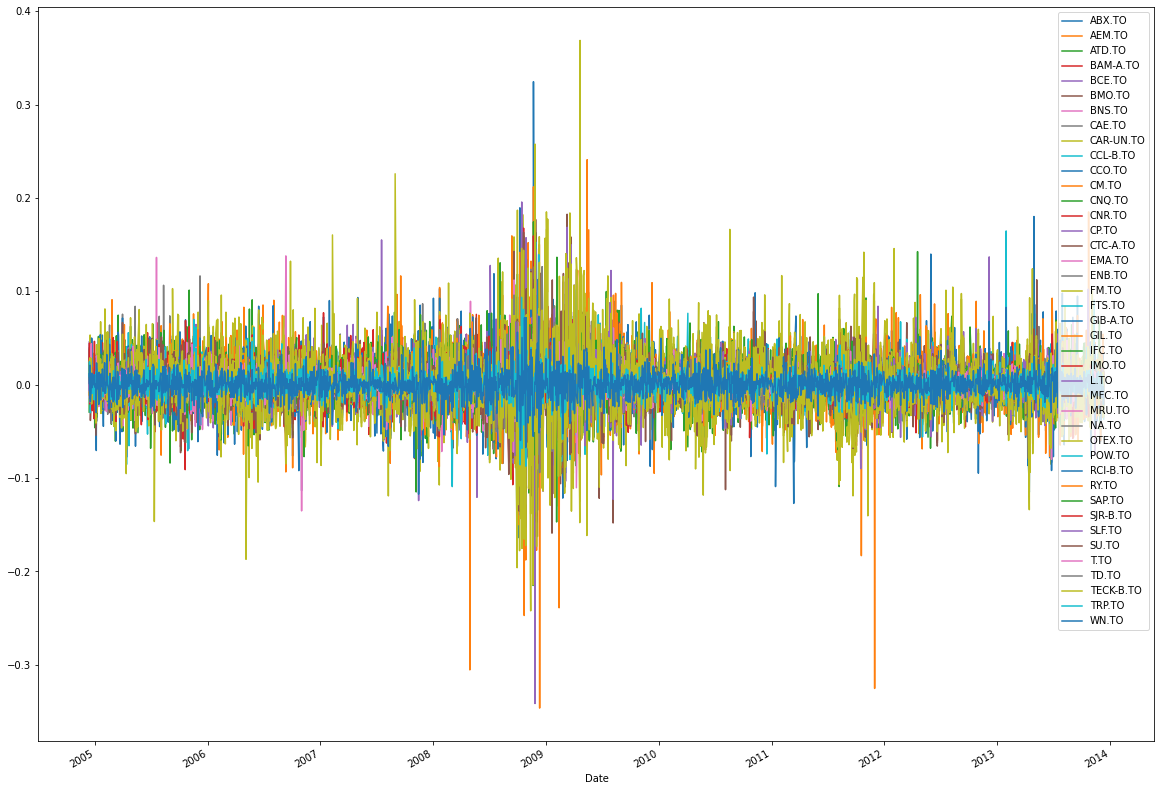

In [ ]:
Y.plot(figsize=(20,15))

In [ ]:
Y.describe().sort_values(by=['std'], axis = 1, ascending=False)

,FM.TO,TECK-B.TO,AEM.TO,ABX.TO,GIL.TO,CNQ.TO,CCO.TO,SU.TO,MFC.TO,ATD.TO,...,TD.TO,CAR-UN.TO,MRU.TO,SJR-B.TO,WN.TO,L.TO,FTS.TO,ENB.TO,TRP.TO,EMA.TO
count,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,...,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%
mean,0.1446%,0.0879%,0.0749%,0.0210%,0.1141%,0.0877%,0.0456%,0.0647%,0.0240%,0.0945%,...,0.0540%,0.0524%,0.0610%,0.0637%,0.0038%,-0.0046%,0.0472%,0.0702%,0.0429%,0.0445%
std,3.8102%,3.5575%,3.1458%,2.7480%,2.6743%,2.6526%,2.6321%,2.5862%,2.3156%,2.2411%,...,1.4942%,1.4907%,1.4543%,1.4314%,1.4137%,1.3576%,1.3056%,1.2196%,1.1420%,1.0656%
min,-19.6088%,-24.2286%,-24.7274%,-16.3942%,-34.6479%,-21.5109%,-13.9710%,-16.2872%,-15.3200%,-10.9097%,...,-12.7378%,-7.5773%,-7.1567%,-6.6202%,-11.7290%,-12.4169%,-6.3434%,-10.0209%,-8.7273%,-5.9492%
25%,-1.8797%,-1.6471%,-1.6150%,-1.3117%,-0.9595%,-1.2851%,-1.3295%,-1.1434%,-0.9314%,-0.8788%,...,-0.5689%,-0.6937%,-0.6904%,-0.6785%,-0.7095%,-0.6518%,-0.5946%,-0.5830%,-0.5408%,-0.5085%
50%,0.1132%,0.0221%,-0.0234%,0.0000%,0.0519%,0.0861%,0.0322%,0.0613%,0.0377%,0.0000%,...,0.0642%,0.0000%,0.0290%,0.0382%,0.0000%,-0.0260%,0.0304%,0.0518%,0.0237%,0.0473%
75%,2.2027%,1.8710%,1.6064%,1.2701%,1.2324%,1.4719%,1.4654%,1.3645%,0.9777%,1.0402%,...,0.6600%,0.7991%,0.7515%,0.8109%,0.7015%,0.6046%,0.6531%,0.7159%,0.6546%,0.5945%
max,18.6944%,36.8825%,21.1946%,32.4627%,24.1078%,17.4428%,17.4355%,16.3234%,18.2609%,14.2571%,...,13.1377%,14.5706%,13.6364%,7.8359%,8.8345%,13.6905%,10.0086%,9.1688%,9.3549%,5.5897%


In [ ]:
Y.describe()

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,...,RY.TO,SAP.TO,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
count,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,...,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%,226400.0000%
mean,0.0210%,0.0749%,0.0945%,0.0595%,0.0522%,0.0402%,0.0482%,0.0694%,0.0524%,0.0936%,...,0.0617%,0.0640%,0.0637%,0.0342%,0.0647%,0.0610%,0.0540%,0.0879%,0.0429%,0.0038%
std,2.7480%,3.1458%,2.2411%,1.8834%,1.5084%,1.5525%,1.5225%,1.9028%,1.4907%,1.9836%,...,1.5981%,1.5539%,1.4314%,2.1121%,2.5862%,1.5089%,1.4942%,3.5575%,1.1420%,1.4137%
min,-16.3942%,-24.7274%,-10.9097%,-11.1049%,-34.1591%,-12.2631%,-13.3371%,-14.5427%,-7.5773%,-10.9863%,...,-13.4499%,-8.6694%,-6.6202%,-13.9600%,-16.2872%,-13.5222%,-12.7378%,-24.2286%,-8.7273%,-11.7290%
25%,-1.3117%,-1.6150%,-0.8788%,-0.8425%,-0.4936%,-0.5762%,-0.5907%,-0.8776%,-0.6937%,-0.8863%,...,-0.6419%,-0.7293%,-0.6785%,-0.8024%,-1.1434%,-0.7256%,-0.5689%,-1.6471%,-0.5408%,-0.7095%
50%,0.0000%,-0.0234%,0.0000%,0.0587%,0.0739%,0.0640%,0.0526%,0.0000%,0.0000%,0.0269%,...,0.0622%,0.0000%,0.0382%,0.0000%,0.0613%,0.0526%,0.0642%,0.0221%,0.0237%,0.0000%
75%,1.2701%,1.6064%,1.0402%,0.9727%,0.5908%,0.6392%,0.7240%,0.9759%,0.7991%,1.0357%,...,0.7254%,0.8125%,0.8109%,0.8718%,1.3645%,0.7976%,0.6600%,1.8710%,0.6546%,0.7015%
max,32.4627%,21.1946%,14.2571%,15.6782%,12.7738%,12.5134%,12.8049%,12.3648%,14.5706%,16.4698%,...,14.6341%,13.6534%,7.8359%,19.5728%,16.3234%,13.7965%,13.1377%,36.8825%,9.3549%,8.8345%


In [ ]:
Y.T.describe()

Date,2004-12-13,2004-12-14,2004-12-15,2004-12-16,2004-12-17,2004-12-20,2004-12-21,2004-12-22,2004-12-23,2004-12-24,...,2013-11-29,2013-12-02,2013-12-03,2013-12-04,2013-12-05,2013-12-06,2013-12-09,2013-12-10,2013-12-11,2013-12-12
count,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,...,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%,4100.0000%
mean,0.7542%,0.9334%,0.2152%,0.5755%,0.0672%,1.0302%,0.8079%,0.4750%,-0.0961%,0.4134%,...,0.0360%,0.2050%,-0.6365%,-0.1801%,-0.5938%,0.5597%,0.3718%,0.1934%,-1.3137%,-0.2046%
std,1.1069%,1.4426%,1.1367%,1.6440%,1.6004%,1.3919%,1.3952%,1.1787%,1.0886%,0.7004%,...,1.0745%,1.8987%,1.2187%,1.0954%,1.0687%,1.1286%,1.0019%,1.6521%,0.9699%,0.9816%
min,-2.9369%,-1.4567%,-2.4662%,-1.8906%,-3.8327%,-1.0239%,-2.0728%,-1.8395%,-2.7841%,-1.4977%,...,-4.7251%,-6.0761%,-4.4608%,-3.8681%,-3.5511%,-1.9366%,-1.5394%,-3.3619%,-3.5776%,-3.6871%
25%,0.0909%,0.0794%,-0.4255%,-0.6143%,-0.7931%,0.0872%,0.0000%,-0.2713%,-0.7672%,0.0000%,...,-0.2821%,-0.2247%,-1.4466%,-0.6229%,-1.2059%,-0.1900%,-0.2709%,-0.6112%,-1.8402%,-0.8050%
50%,0.7735%,0.7937%,0.0232%,0.2118%,0.0000%,0.7995%,0.7007%,0.4450%,-0.3135%,0.4412%,...,0.1709%,0.2055%,-0.4592%,-0.1863%,-0.5746%,0.5181%,0.2228%,-0.3187%,-1.2495%,-0.2869%
75%,1.2676%,1.5159%,0.9063%,1.2190%,0.9588%,1.5535%,1.2241%,1.3189%,0.3187%,0.9893%,...,0.5276%,1.3508%,0.0734%,0.1961%,-0.0994%,1.4257%,0.8400%,0.5415%,-0.5576%,0.1608%
max,2.8603%,4.6481%,3.1931%,5.3237%,2.7688%,4.5834%,5.0000%,3.2123%,3.1037%,1.3885%,...,2.1149%,2.8868%,2.7673%,3.3395%,2.0484%,3.1472%,3.8462%,5.4025%,0.5256%,1.7752%


Text(0.5, 1.0, 'Assets Correlation Matrix')

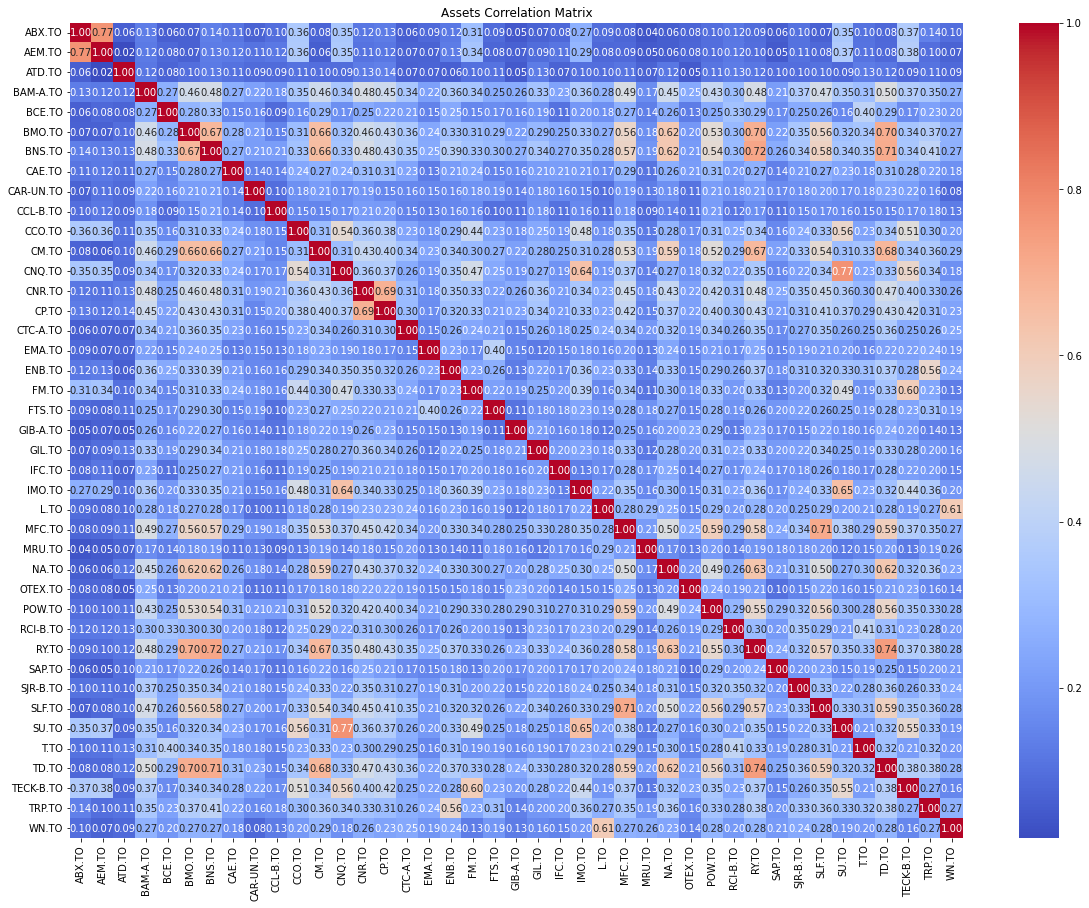

In [ ]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

Y.corr()

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(Y.corr(method ='spearman'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
ax.set_title('Assets Correlation Matrix')

# 2. Estimating Black Litterman Portfolios

2.1 Calculating a reference portfolio.

In [ ]:
pip install Riskfolio-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 3.1 MB/s 
     |████████████████████████████████| 13.0 MB 26.5 MB/s 
     |████████████████████████████████| 90 kB 2.5 MB/s 
     |████████████████████████████████| 149 kB 43.8 MB/s 
     |████████████████████████████████| 907 kB 34.4 MB/s 
     |████████████████████████████████| 9.4 MB 14 kB/s 
     |████████████████████████████████| 965 kB 19.1 MB/s 
     |████████████████████████████████| 295 kB 33.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.02 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,...,RY.TO,SAP.TO,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
weights,0.0000%,0.9873%,9.9573%,0.0000%,4.1403%,0.0000%,0.0000%,0.1728%,2.9478%,10.4161%,...,0.0000%,9.0060%,1.5119%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


In [ ]:
# remove those tickers that have weights that are <= 0.0001
w1 = w.T
w2 = w1.loc[:, (w1 > 0.0001).any(axis=0)]
w2

,AEM.TO,ATD.TO,BCE.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,EMA.TO,ENB.TO,GIB-A.TO,GIL.TO,IFC.TO,MRU.TO,OTEX.TO,RCI-B.TO,SAP.TO,SJR-B.TO
weights,0.9873%,9.9573%,4.1403%,0.1728%,2.9478%,10.4161%,8.2608%,17.4049%,8.1160%,3.7603%,1.0163%,10.5574%,6.8167%,4.9281%,9.0060%,1.5119%


In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 1.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
riskfolio-lib 3.3.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


2.2 Plotting reference portfolio composition

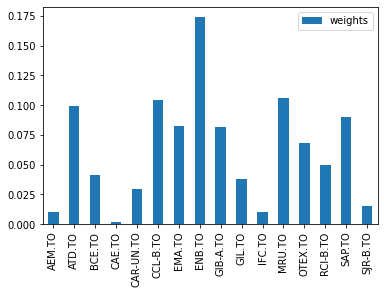

In [ ]:
w2.T.plot(kind='bar')

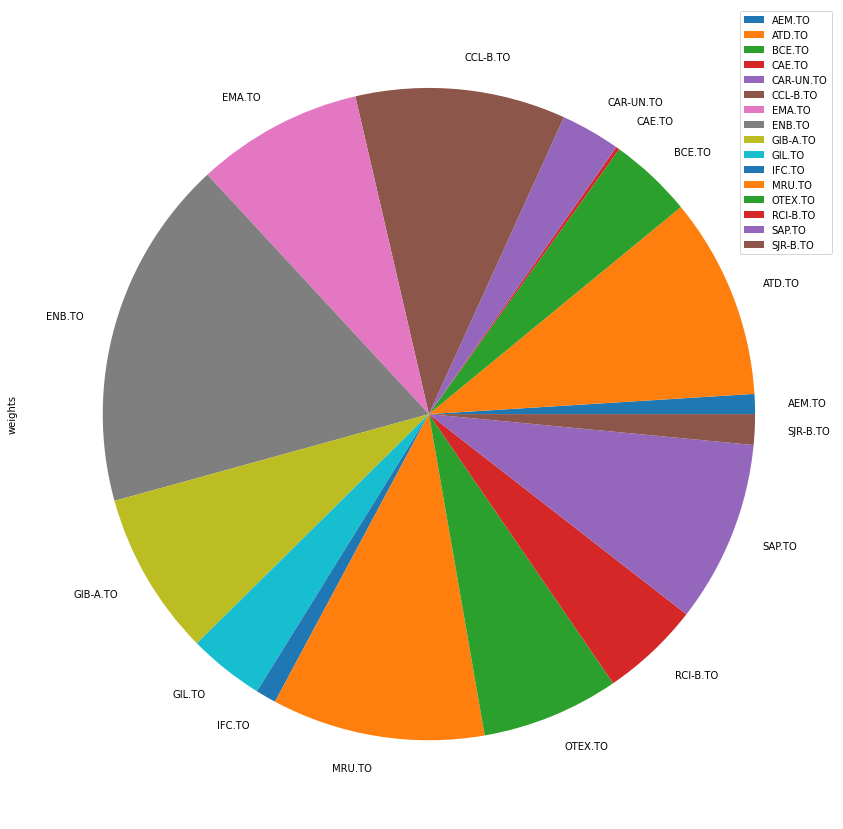

In [ ]:
# Plotting the composition of the portfolio

#I had some trouble runing the 2nd line below, seems to do with the version of matplotlib, so I did another pie chart
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20", height=6, width=10, ax=None)
plot = w2.T.plot.pie(subplots=True, figsize=(20, 15))

2.3 Black Litterman portfolios

In [ ]:
asset_classes = {'Assets': ['AEM.TO', 'ATD.TO', 'BCE.TO', 'BMO.TO', 'BNS.TO', 'ABX.TO', 'BAM-A.TO', 
                           'CAE.TO', 'CCL-B.TO', 'GIB-A.TO', 'CCO.TO', 'CAR-UN.TO', 'CM.TO', 'CNR.TO',
                           'CNQ.TO', 'CP.TO', 'CTC-A.TO', 'EMA.TO', 'ENB.TO', 'FM.TO',
                           'FTS.TO', 'WN.TO', 'GIL.TO', 'IMO.TO', 'IFC.TO', 
                           'L.TO', 'MFC.TO', 'MRU.TO', 'NA.TO', 'OTEX.TO',
                           'POW.TO', 'RCI-B.TO', 'RY.TO', 'SAP.TO', 'SJR-B.TO',
                           'SLF.TO', 'SU.TO', 'TRP.TO', 'TECK-B.TO', 'T.TO', 'TD.TO'], 
                 
                 'Industry': ['Basic Materials','Consumer Staples', 'Communication Services',
                              'Financial Services','Financial Services', 'Basic Materials','Financial Services',
                              'Industrials', 'Consumer Cyclical','Information Technology', 'Energy', 'Real Estate',
                              'Financial Services', 'Industrials','Energy', 'Industrials', 'Consumer Cyclical',
                              'Utilities','Energy', 'Basic Materials','Utilities',
                              'Consumer Staples', 'Consumer Cyclical','Energy','Financial Services',
                              'Consumer Staples','Financial Services','Consumer Staples',
                              'Financial Services','Information Technology','Financial Services', 
                              'Communication Services','Financial Services', 'Consumer Staples',
                              'Communication Services','Financial Services', 'Energy','Energy',
                              'Basic Materials', 'Communication Services','Financial Services']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Classes', 'Classes', 'Classes'],
         'Set': ['Industry', 'Industry', 'Industry'],
         'Position': ['Energy', 'Financial Services', 'Basic Materials'],
         'Sign': ['<=', '>=', '<='],
         'Weight': [0.10, 0.10, 0.10], # Annual terms 
         'Type Relative': ['Classes', 'Classes', 'Classes'],
         'Relative Set': ['Industry', 'Industry', 'Industry'],
         'Relative': ['Financial Services', 'Utilities', 'Industrials']}



views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Classes,Industry,Energy,<=,10.0000%,Classes,Industry,Financial Services
1,False,Classes,Industry,Financial Services,>=,10.0000%,Classes,Industry,Utilities
2,False,Classes,Industry,Basic Materials,<=,10.0000%,Classes,Industry,Industrials


In [ ]:
P, Q = rp.assets_views(views, asset_classes)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2
0,0.0000%,0.0000%,25.0000%
1,0.0000%,0.0000%,25.0000%
2,0.0000%,0.0000%,0.0000%
3,-9.0909%,9.0909%,0.0000%
4,0.0000%,0.0000%,0.0000%
5,-9.0909%,9.0909%,0.0000%
6,-9.0909%,9.0909%,0.0000%
7,0.0000%,0.0000%,-33.3333%
8,0.0000%,0.0000%,0.0000%
9,0.0000%,0.0000%,0.0000%


,0
0,10.0000%
1,10.0000%
2,10.0000%


In [ ]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

#display(w_bl.T)
display(w_bl.T.iloc[:,0:15])
display(w_bl.T.iloc[:,16:30])
display(w_bl.T.iloc[:,31:41])

#only 19 stocks were chosen

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,CCO.TO,CM.TO,CNQ.TO,CNR.TO,CP.TO
weights,0.3222%,1.1944%,9.9132%,0.0000%,3.9175%,0.0000%,0.0000%,0.0000%,2.6646%,10.3363%,1.0723%,0.0000%,1.0768%,0.0000%,0.0000%


,EMA.TO,ENB.TO,FM.TO,FTS.TO,GIB-A.TO,GIL.TO,IFC.TO,IMO.TO,L.TO,MFC.TO,MRU.TO,NA.TO,OTEX.TO,POW.TO
weights,6.4715%,18.3255%,0.0000%,0.0000%,7.7979%,3.3892%,0.0000%,1.0061%,0.0000%,0.0000%,10.3652%,0.0000%,6.7040%,0.0000%


,RY.TO,SAP.TO,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
weights,0.0000%,8.8050%,0.7736%,0.0000%,1.0084%,0.0000%,0.0000%,0.0000%,0.3151%,0.0000%


In [ ]:
# remove those tickers that have weights that are <= 0.0001
w_bl1 = w_bl.T
w_bl2 = w_bl1.loc[:, (w1 > 0.0001).any(axis=0)]
w_bl2

,AEM.TO,ATD.TO,BCE.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,EMA.TO,ENB.TO,GIB-A.TO,GIL.TO,IFC.TO,MRU.TO,OTEX.TO,RCI-B.TO,SAP.TO,SJR-B.TO
weights,1.1944%,9.9132%,3.9175%,0.0000%,2.6646%,10.3363%,6.4715%,18.3255%,7.7979%,3.3892%,0.0000%,10.3652%,6.7040%,4.5412%,8.8050%,0.7736%


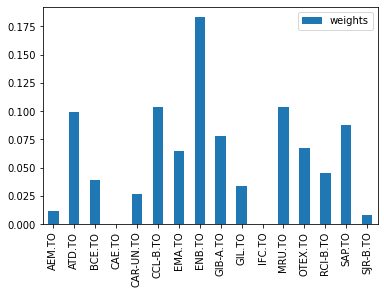

In [ ]:
w_bl2.T.plot(kind='bar')

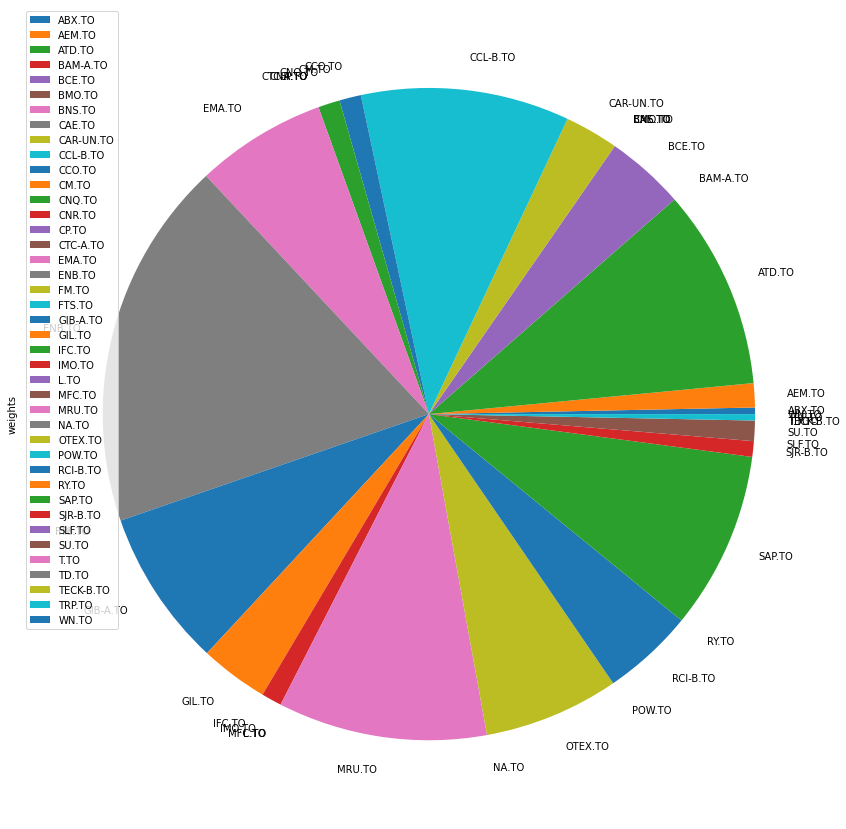

In [ ]:
# Plotting the composition of the portfolio

#ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
#                 cmap = "tab20", height=6, width=10, ax=None)
#plot = w_bl2.T.plot.pie(subplots=True, figsize=(20, 15))
plot = w_bl.plot.pie(subplots=True, figsize=(20, 15))

In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,...,RY.TO,SAP.TO,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
0,2.0962%,0.0000%,3.5041%,0.0000%,10.5991%,0.0000%,0.0000%,0.0000%,7.5760%,2.7894%,...,0.0000%,7.9658%,1.2266%,0.0000%,0.0000%,0.1187%,0.0000%,0.0000%,7.8917%,3.2397%
1,1.5784%,0.6908%,8.3110%,0.0000%,5.6050%,0.0000%,0.0000%,0.1385%,4.4069%,8.5195%,...,0.0000%,8.5076%,1.2624%,0.0000%,0.0000%,0.1702%,0.0000%,0.0000%,3.2638%,0.6534%
2,0.3399%,1.1883%,9.8947%,0.0000%,3.9399%,0.0000%,0.0000%,0.0000%,2.6896%,10.3151%,...,0.0000%,8.8051%,0.7846%,0.0000%,0.9985%,0.0000%,0.0000%,0.0000%,0.3615%,0.0000%
3,0.0000%,0.9460%,11.1558%,0.0000%,2.3052%,0.0000%,0.0000%,0.0000%,0.8126%,11.7383%,...,0.0000%,8.6322%,0.0000%,0.0000%,1.4225%,0.0000%,0.0000%,0.2709%,0.0000%,0.0000%
4,0.0000%,0.3001%,12.3253%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,12.9604%,...,0.0000%,7.5821%,0.0000%,0.0000%,1.6514%,0.0000%,0.0000%,0.7895%,0.0000%,0.0000%


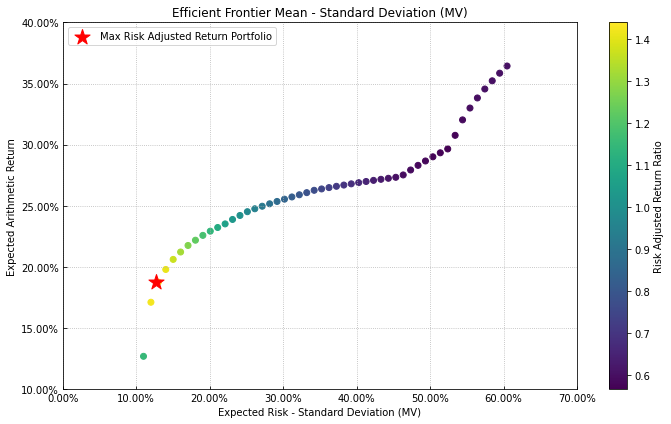

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

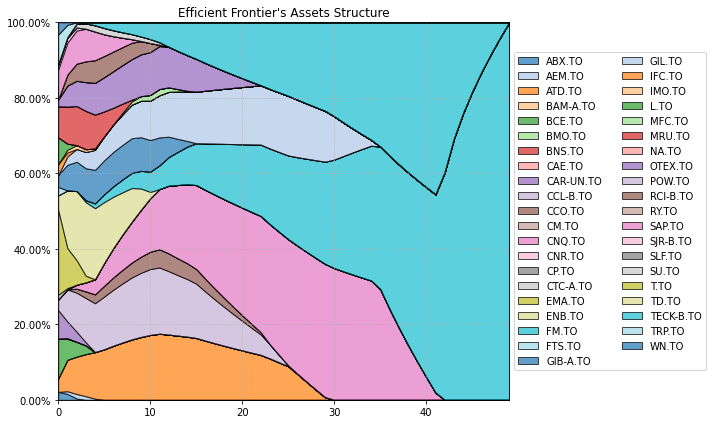

In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# 3. Estimating Black Litterman Mean Risk Portfolios
When we use risk measures different than Standard Deviation, Riskfolio-Lib only considers the vector of expected returns, and use historical returns to calculate risk measures.

3.1 Calculate Black Litterman Portfolios for Several Risk Measures

In [ ]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

#rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
#      'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

rms = ['MV', 'CVaR', 'SLPM', 'ADD']


w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,CVaR,SLPM,ADD
ABX.TO,0.32%,0.85%,0.98%,4.27%
AEM.TO,1.19%,0.00%,1.27%,7.31%
ATD.TO,9.91%,12.44%,11.54%,10.77%
BAM-A.TO,0.00%,0.00%,0.00%,0.00%
BCE.TO,3.92%,0.00%,0.38%,3.83%
BMO.TO,0.00%,0.00%,0.00%,0.00%
BNS.TO,0.00%,0.00%,0.00%,0.00%
CAE.TO,0.00%,0.00%,0.00%,0.00%
CAR-UN.TO,2.66%,0.00%,0.00%,0.00%
CCL-B.TO,10.34%,13.93%,11.23%,0.00%


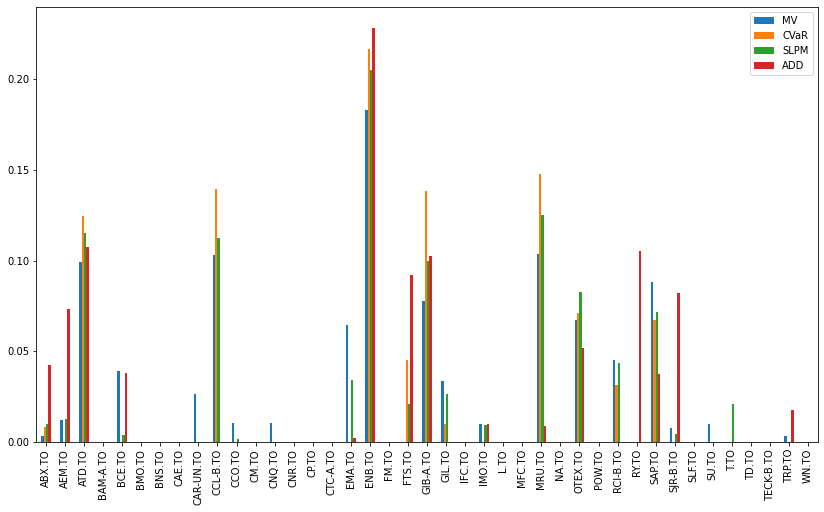

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

# 4. Multi Assets Algorithmic Trading Backtesting with Backtrader
For this tutorial we need matplotlib=3.2.2 because backtrader only works with this version of matplotlib. However, this version of matplotlib give us an error in plot_pie function.

# 4.1 Downloading the data:

In [1]:
pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 19.5 MB/s 


In [4]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format  #Jeremy added this

# Date range
start = '1980-01-01'
end = '2022-12-05'

# Tickers of assets
#assets = ['AEM.TO', 'AQN.TO', 'ATD.TO', 'BCE.TO', 'BMO.TO', 'BNS.TO', 
#          'ABX.TO', 'BAM-A.TO', 'BIP-UN.TO', 'CAE.TO', 'CCL-B.TO', 
#          'GIB-A.TO', 'CCO.TO', 'CAR-UN.TO', 'CM.TO', 'CNR.TO', 'XIU.TO'] #XIU.TO is iShares S&P/TSX 60 Index ETF, cant find TSX60


assets = ['AEM.TO', 'ATD.TO', 'BCE.TO', 'BMO.TO', 'BNS.TO', 'ABX.TO', 'BAM-A.TO', 
          'CAE.TO', 'CCL-B.TO', 'GIB-A.TO', 'CCO.TO', 'CAR-UN.TO', 'CM.TO', 'CNR.TO',
          'CNQ.TO', 'CP.TO', 'CTC-A.TO', 'EMA.TO', 'ENB.TO', 'FM.TO',
          'FTS.TO', 'WN.TO', 'GIL.TO', 'IMO.TO', 'IFC.TO', 
          'L.TO', 'MFC.TO', 'MRU.TO', 'NA.TO', 'OTEX.TO',
          'POW.TO', 'RCI-B.TO', 'RY.TO', 'SAP.TO', 'SJR-B.TO',
          'SLF.TO', 'SU.TO', 'TRP.TO', 'TECK-B.TO', 'T.TO', 'TD.TO', 'XIU.TO']

assets.sort()

#data = yf.download(assets, start = start, end = end)
#data = data.loc[:,('Adj Close', slice(None))]
#data.columns = assets
#display(data)

# Downloading data
prices = yf.download(assets, start=start, end=end)
#display(prices.head())
prices = prices.dropna()
display(prices.head())

[*********************100%***********************]  42 of 42 completed


Adj Close                                                       \
               ABX.TO     AEM.TO    ATD.TO  BAM-A.TO     BCE.TO     BMO.TO   
Date                                                                         
2004-12-10 2207.6307% 1379.6783% 253.7008% 621.1119% 1167.6892% 2519.8515%   
2004-12-13 2229.3201% 1387.0307% 246.2499% 636.4750% 1175.9561% 2534.9436%   
2004-12-14 2210.7290% 1383.7628% 255.5634% 629.0129% 1192.4900% 2555.0648%   
2004-12-15 2232.4181% 1376.4112% 255.5634% 629.1593% 1209.0239% 2566.9548%   
2004-12-16 2206.8565% 1360.0737% 252.9558% 618.0393% 1206.9567% 2581.5891%   

                                                     ...         Volume  \
               BNS.TO    CAE.TO CAR-UN.TO  CCL-B.TO  ...         SAP.TO   
Date                                                 ...                  
2004-12-10 1810.4055% 351.8822% 582.6841% 272.7183%  ... 27600000.0000%   
2004-12-13 1821.6051% 351.8822% 586.4303% 274.1052%  ...  9520000.0000%   
2004-12-14 1840.7354% 354.2386% 584.7655% 277.4948%  ... 15280000.0000%   
2004-12-15 1843.0685% 360.5642% 589.7597% 277.3407%  ... 60440000.0000%   
2004-12-16 1844.0012% 370.8434% 591.0086% 283.6579%  ... 18120000.0000%   

                                                                            \
                 SJR-B.TO          SLF.TO           SU.TO             T.TO   
Date                                                                         
2004-12-10 42840000.0000% 103590000.0000% 157600000.0000%  527880000.0000%   
2004-12-13 28980000.0000% 120040000.0000% 238720000.0000%  513600000.0000%   
2004-12-14 73160000.0000% 400440000.0000% 190620000.0000% 1106600000.0000%   
2004-12-15 44940000.0000%  97140000.0000% 248200000.0000%  616200000.0000%   
2004-12-16 76280000.0000% 197860000.0000% 212980000.0000% 1167520000.0000%   

                                                                           \
                     TD.TO       TECK-B.TO          TRP.TO          WN.TO   
Date                                                                        
2004-12-10 322520000.0000% 240458800.0000%  79300000.0000%  5400000.0000%   
2004-12-13 162640000.0000% 152366600.0000% 131230000.0000%  4540000.0000%   
2004-12-14 395140000.0000% 279544400.0000% 103020000.0000%  5250000.0000%   
2004-12-15 120660000.0000% 132913600.0000% 164520000.0000%  3090000.0000%   
2004-12-16 716160000.0000% 259940800.0000% 116700000.0000% 14140000.0000%   

                            
                    XIU.TO  
Date                        
2004-12-10 434360000.0000%  
2004-12-13 265760000.0000%  
2004-12-14 330680000.0000%  
2004-12-15 249040000.0000%  
2004-12-16 345880000.0000%  

[5 rows x 252 columns]

In [5]:
############################################################
# Showing data
############################################################

display(prices.head())

Adj Close                                                       \
               ABX.TO     AEM.TO    ATD.TO  BAM-A.TO     BCE.TO     BMO.TO   
Date                                                                         
2004-12-10 2207.6307% 1379.6783% 253.7008% 621.1119% 1167.6892% 2519.8515%   
2004-12-13 2229.3201% 1387.0307% 246.2499% 636.4750% 1175.9561% 2534.9436%   
2004-12-14 2210.7290% 1383.7628% 255.5634% 629.0129% 1192.4900% 2555.0648%   
2004-12-15 2232.4181% 1376.4112% 255.5634% 629.1593% 1209.0239% 2566.9548%   
2004-12-16 2206.8565% 1360.0737% 252.9558% 618.0393% 1206.9567% 2581.5891%   

                                                     ...         Volume  \
               BNS.TO    CAE.TO CAR-UN.TO  CCL-B.TO  ...         SAP.TO   
Date                                                 ...                  
2004-12-10 1810.4055% 351.8822% 582.6841% 272.7183%  ... 27600000.0000%   
2004-12-13 1821.6051% 351.8822% 586.4303% 274.1052%  ...  9520000.0000%   
2004-12-14 1840.7354% 354.2386% 584.7655% 277.4948%  ... 15280000.0000%   
2004-12-15 1843.0685% 360.5642% 589.7597% 277.3407%  ... 60440000.0000%   
2004-12-16 1844.0012% 370.8434% 591.0086% 283.6579%  ... 18120000.0000%   

                                                                            \
                 SJR-B.TO          SLF.TO           SU.TO             T.TO   
Date                                                                         
2004-12-10 42840000.0000% 103590000.0000% 157600000.0000%  527880000.0000%   
2004-12-13 28980000.0000% 120040000.0000% 238720000.0000%  513600000.0000%   
2004-12-14 73160000.0000% 400440000.0000% 190620000.0000% 1106600000.0000%   
2004-12-15 44940000.0000%  97140000.0000% 248200000.0000%  616200000.0000%   
2004-12-16 76280000.0000% 197860000.0000% 212980000.0000% 1167520000.0000%   

                                                                           \
                     TD.TO       TECK-B.TO          TRP.TO          WN.TO   
Date                                                                        
2004-12-10 322520000.0000% 240458800.0000%  79300000.0000%  5400000.0000%   
2004-12-13 162640000.0000% 152366600.0000% 131230000.0000%  4540000.0000%   
2004-12-14 395140000.0000% 279544400.0000% 103020000.0000%  5250000.0000%   
2004-12-15 120660000.0000% 132913600.0000% 164520000.0000%  3090000.0000%   
2004-12-16 716160000.0000% 259940800.0000% 116700000.0000% 14140000.0000%   

                            
                    XIU.TO  
Date                        
2004-12-10 434360000.0000%  
2004-12-13 265760000.0000%  
2004-12-14 330680000.0000%  
2004-12-15 249040000.0000%  
2004-12-16 345880000.0000%  

[5 rows x 252 columns]

# 4.2. Building the Backtest Function with Backtrader¶
4.2.1 Defining Backtest Function

In [ ]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(10000000.0)  #start with 10 million dollars
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=rf)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

4.2.2 Building Data Feeds for Backtesting

In [ ]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != 'XIU.TO':
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), 'XIU.TO')].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2004-12-10,1255.2500%,1265.0000%,1255.0000%,1262.5000%,434360000.0000%
2004-12-13,1262.5000%,1265.5000%,1254.0000%,1256.2500%,265760000.0000%
2004-12-14,1270.5000%,1274.0000%,1263.0000%,1263.0000%,330680000.0000%
2004-12-15,1274.5000%,1276.2500%,1267.2500%,1270.0000%,249040000.0000%
2004-12-16,1271.2500%,1280.0000%,1271.2500%,1272.7500%,345880000.0000%


# 4.3 Building Strategies with Backtrader
4.3.1 Buy and Hold TSX60

In [ ]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 2250: #Dec 14, 2013 to Dec 2, 2022. Total 2250 trading days, roughly 9 years
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

In [ ]:
#had some trouble running this, likely due to matplotlib version
!pip install matplotlib==3.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


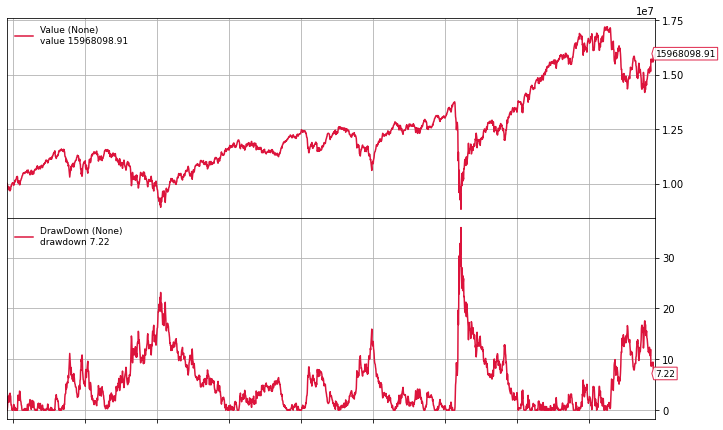

In [ ]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
#plt.plot() # We need to do this to avoid errors in inline plot

start = 2250
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

# 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [ ]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=['XIU.TO']).dropna()
returns = data.pct_change().dropna()
display(returns.head())

,ABX.TO,AEM.TO,ATD.TO,BAM-A.TO,BCE.TO,BMO.TO,BNS.TO,CAE.TO,CAR-UN.TO,CCL-B.TO,...,RY.TO,SAP.TO,SJR-B.TO,SLF.TO,SU.TO,T.TO,TD.TO,TECK-B.TO,TRP.TO,WN.TO
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-13,0.9825%,0.5328%,-2.9368%,2.4735%,0.7080%,0.5989%,0.6185%,0.0000%,0.6428%,0.5085%,...,-0.1585%,2.1593%,2.0559%,-0.2503%,0.7965%,-0.0299%,0.7734%,2.5023%,0.8693%,1.1685%
2004-12-14,-0.8339%,-0.2356%,3.7821%,-1.1724%,1.4060%,0.7938%,1.0503%,0.6697%,-0.2839%,1.2367%,...,0.0794%,2.3993%,4.4604%,1.0288%,1.9373%,-0.7199%,0.4069%,2.0000%,2.4473%,-0.0745%
2004-12-15,0.9811%,-0.5313%,0.0000%,0.0233%,1.3865%,0.4654%,0.1267%,1.7858%,0.8541%,-0.0555%,...,-0.0158%,-0.5579%,-2.0662%,-0.3974%,1.0252%,0.9063%,-0.4255%,-0.0865%,0.4711%,-1.4262%
2004-12-16,-1.1451%,-1.1869%,-1.0204%,-1.7675%,-0.1710%,0.5701%,0.0506%,2.8508%,0.2117%,2.2778%,...,0.3331%,2.3843%,1.2190%,-0.1746%,-1.1139%,2.6946%,0.6308%,2.8860%,0.8707%,2.0804%
2004-12-17,0.2107%,0.6006%,2.7688%,-1.7046%,-0.1712%,-0.5492%,0.1771%,2.3454%,2.1127%,-2.2271%,...,-0.3162%,0.1370%,-0.8337%,-1.9485%,2.3780%,2.0992%,0.3033%,2.6647%,0.6308%,-1.8064%


In [ ]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 2250]

In [ ]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': ['AEM.TO', 'ATD.TO', 'BCE.TO', 'BMO.TO', 'BNS.TO', 'ABX.TO', 'BAM-A.TO', 
                           'CAE.TO', 'CCL-B.TO', 'GIB-A.TO', 'CCO.TO', 'CAR-UN.TO', 'CM.TO', 'CNR.TO',
                           'CNQ.TO', 'CP.TO', 'CTC-A.TO', 'EMA.TO', 'ENB.TO', 'FM.TO',
                           'FTS.TO', 'WN.TO', 'GIL.TO', 'IMO.TO', 'IFC.TO', 
                           'L.TO', 'MFC.TO', 'MRU.TO', 'NA.TO', 'OTEX.TO',
                           'POW.TO', 'RCI-B.TO', 'RY.TO', 'SAP.TO', 'SJR-B.TO',
                           'SLF.TO', 'SU.TO', 'TRP.TO', 'TECK-B.TO', 'T.TO', 'TD.TO'], 
                 
                 'Industry': ['Basic Materials','Consumer Staples', 'Communication Services',
                              'Financial Services','Financial Services', 'Basic Materials','Financial Services',
                              'Industrials', 'Consumer Cyclical','Information Technology', 'Energy', 'Real Estate',
                              'Financial Services', 'Industrials','Energy', 'Industrials', 'Consumer Cyclical',
                              'Utilities','Energy', 'Basic Materials','Utilities',
                              'Consumer Staples', 'Consumer Cyclical','Energy','Financial Services',
                              'Consumer Staples','Financial Services','Consumer Staples',
                              'Financial Services','Information Technology','Financial Services', 
                              'Communication Services','Financial Services', 'Consumer Staples',
                              'Communication Services','Financial Services', 'Energy','Energy',
                              'Basic Materials', 'Communication Services','Financial Services']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False],
               #'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Type': ['Basic Materials', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Basic Materials,,,<=,10.0000%,,,,
1,False,All Classes,Industry,,<=,20.0000%,,,,
2,False,All Classes,Industry,,>=,3.0000%,,,,


In [ ]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [ ]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV', 'CVaR', 'SLPM', 'ADD']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-2250:i,:] # taking last 9 years (2250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        port.ainequality = A
        port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

     
        # Estimate optimal portfolio:
        
        #port.solvers = ['MOSEK']
        port.alpha = 0.05
        model='BL' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        rm = j # Risk measure used, this time will be variance
        obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        hist = True # Use historical scenarios for risk measures that depend on scenarios
        rf = 0.02 # Risk free rate
        l = 0 # Risk aversion factor, only useful when obj is 'Utility'

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_

CPU times: user 1min 19s, sys: 19.1 s, total: 1min 38s
Wall time: 1min 28s


In [ ]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

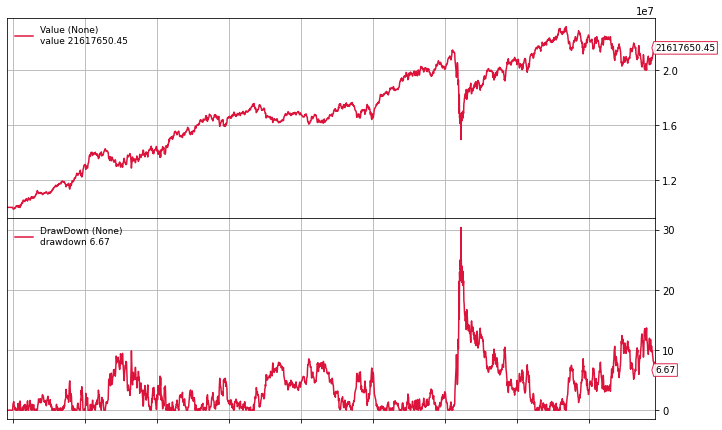

In [ ]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

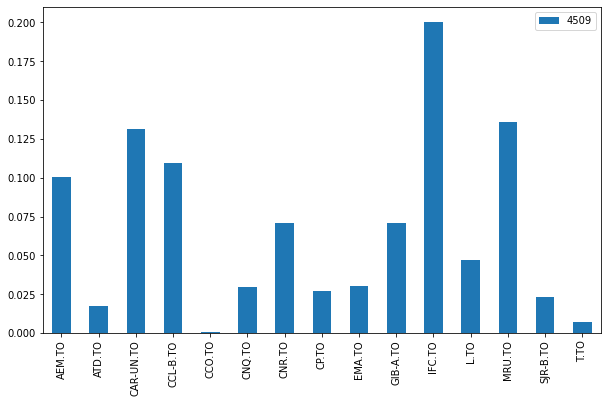

In [ ]:
w2.T.plot(kind='bar')

,AEM.TO,ATD.TO,CAR-UN.TO,CCL-B.TO,CCO.TO,CNQ.TO,CNR.TO,CP.TO,EMA.TO,GIB-A.TO,IFC.TO,L.TO,MRU.TO,SJR-B.TO,T.TO
4509,10.0161%,1.7191%,13.1176%,10.9583%,0.0442%,2.9558%,7.0964%,2.7316%,3.0001%,7.0799%,19.9999%,4.6929%,13.5879%,2.2972%,0.7028%


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1722bf13d0>],
      dtype=object)

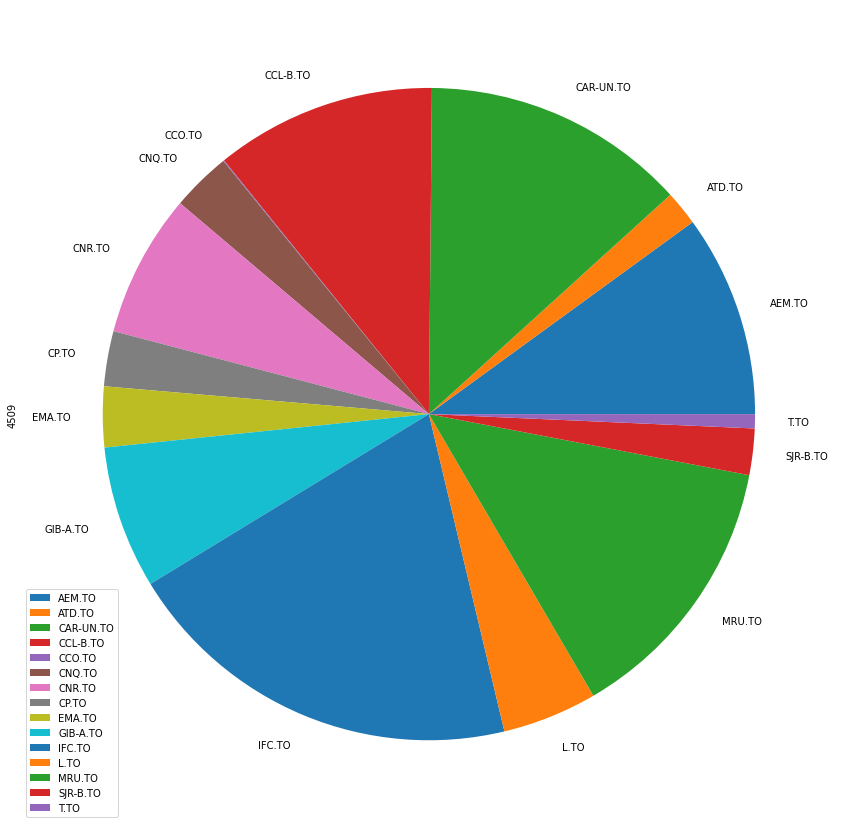

In [ ]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

# remove those tickers that have weights that are <= 0.0001
w1 = w.T
w2 = w1.loc[:, (w1 > 0.0001).any(axis=0)]
display(w2)

w2.T.plot.pie(subplots=True, figsize=(20, 15))

In [ ]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

,weights
Industry,
Basic Materials,10.0161%
Communication Services,3.0000%
Consumer Cyclical,10.9583%
Consumer Staples,20.0000%
Energy,3.0000%
Financial Services,20.0000%
Industrials,9.8280%
Information Technology,7.0799%
Real Estate,13.1176%


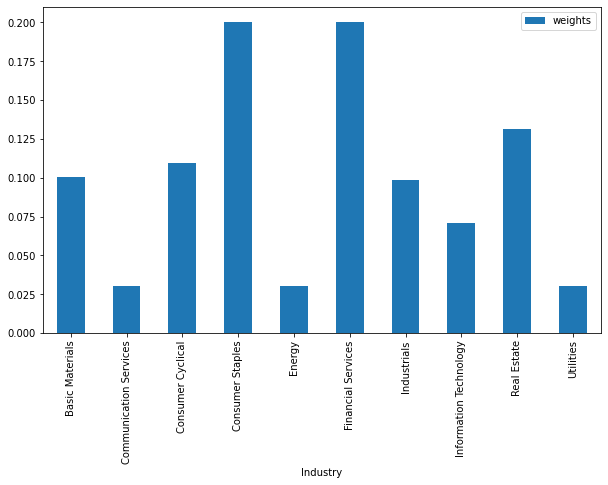

In [ ]:
w_classes.plot(kind='bar')

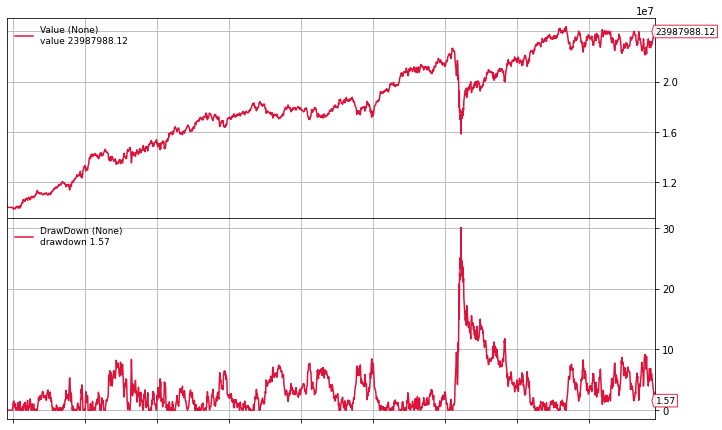

In [ ]:
############################################################
# Backtesting Mean CVaR Strategy
############################################################

assets = returns.columns.tolist()
weights = models['CVaR']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

,AEM.TO,CAR-UN.TO,CCL-B.TO,CNQ.TO,CNR.TO,CP.TO,EMA.TO,GIB-A.TO,IFC.TO,L.TO,MRU.TO,SJR-B.TO,T.TO
4509,9.5037%,4.2624%,6.7038%,3.0000%,10.7512%,4.5671%,6.0735%,12.1382%,20.0000%,2.0496%,17.9504%,0.5428%,2.4572%


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0055002fa0>],
      dtype=object)

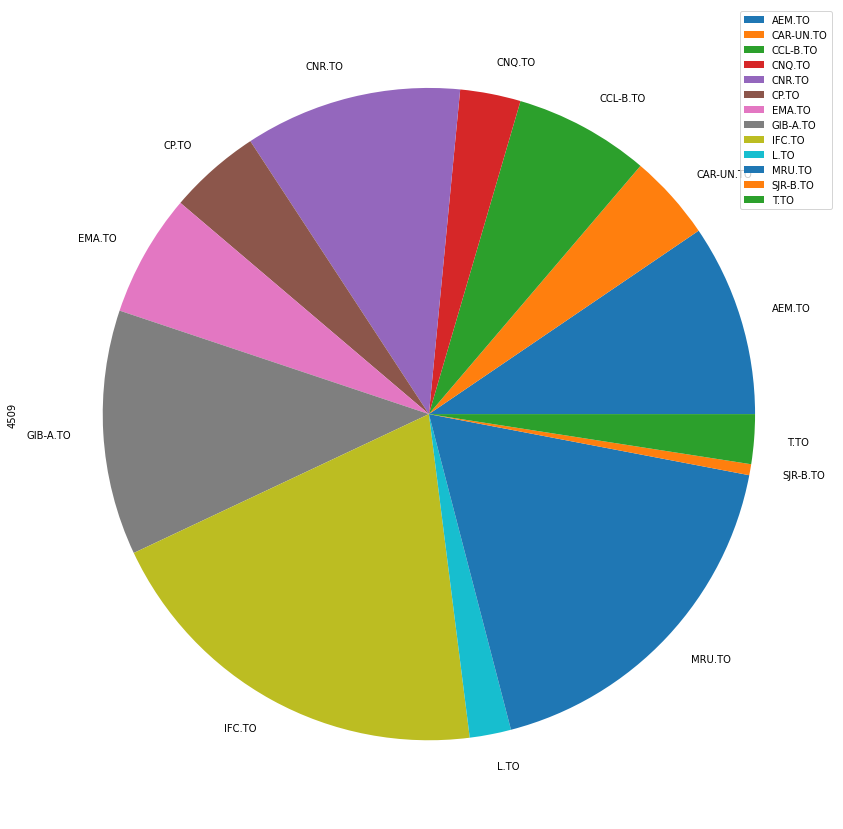

In [ ]:
############################################################
# Plotting the composition of the last CVaR portfolio
############################################################

w = pd.DataFrame(models['CVaR'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

# remove those tickers that have weights that are <= 0.0001
w1 = w.T
w2 = w1.loc[:, (w1 > 0.0001).any(axis=0)]
display(w2)

w2.T.plot.pie(subplots=True, figsize=(20, 15))

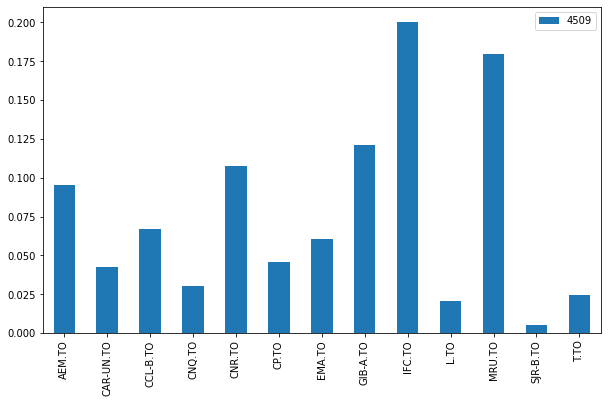

In [ ]:
w2.T.plot(kind='bar')

,weights
Industry,
Basic Materials,9.5037%
Communication Services,3.0000%
Consumer Cyclical,6.7038%
Consumer Staples,20.0000%
Energy,3.0000%
Financial Services,20.0000%
Industrials,15.3183%
Information Technology,12.1382%
Real Estate,4.2624%


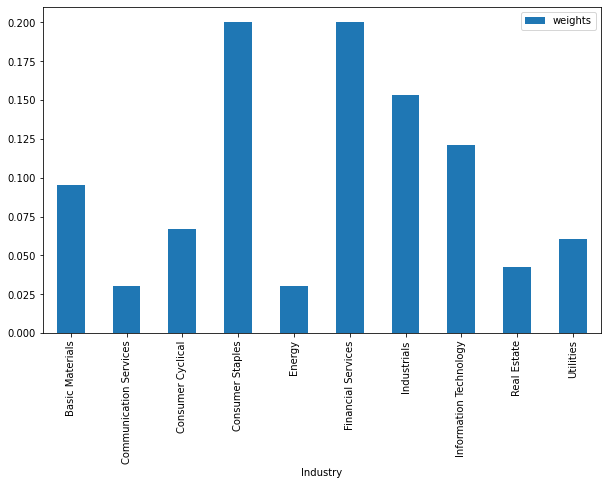

In [ ]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

w_classes.plot(kind='bar')

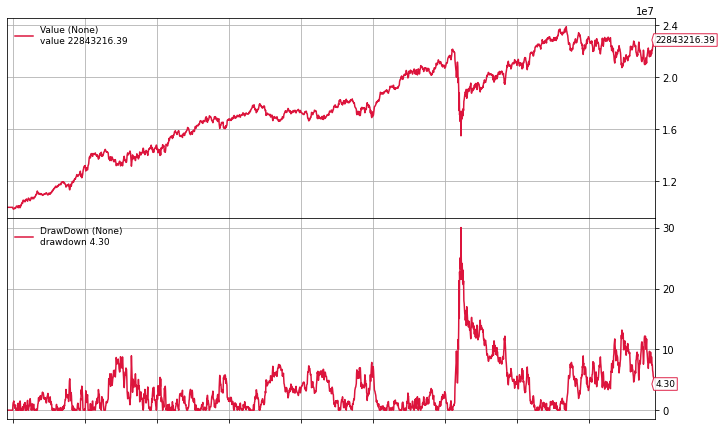

In [ ]:
############################################################
# Backtesting SLPM Strategy
############################################################

assets = returns.columns.tolist()
weights = models['SLPM']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

,AEM.TO,CAR-UN.TO,CCL-B.TO,CCO.TO,CNQ.TO,CNR.TO,CP.TO,EMA.TO,GIB-A.TO,IFC.TO,L.TO,MRU.TO,SJR-B.TO,T.TO
4509,10.7700%,9.0494%,12.7679%,0.8777%,2.1223%,9.2065%,2.7466%,3.0000%,6.4596%,20.0000%,1.1285%,18.8715%,2.2412%,0.7588%


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0054b5c160>],
      dtype=object)

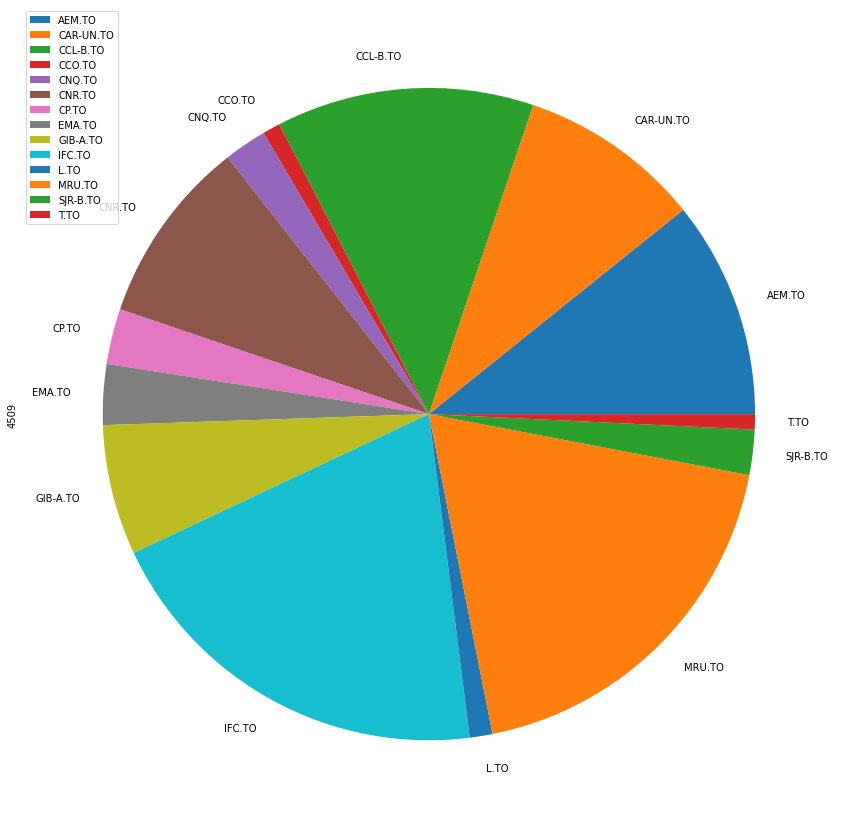

In [ ]:
############################################################
# Plotting the composition of the last SLPM portfolio
############################################################

w = pd.DataFrame(models['SLPM'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean WR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

# remove those tickers that have weights that are <= 0.0001
w1 = w.T
w2 = w1.loc[:, (w1 > 0.0001).any(axis=0)]
display(w2)

w2.T.plot.pie(subplots=True, figsize=(20, 15))

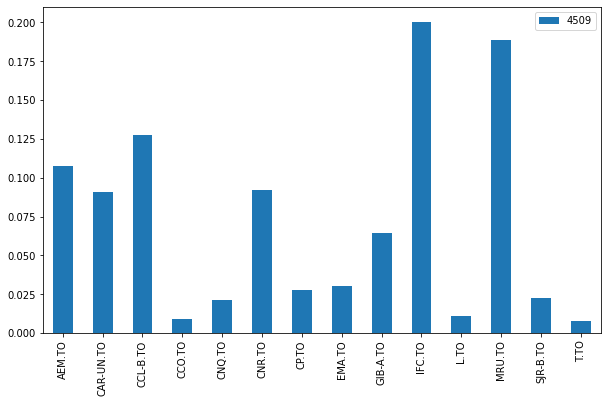

In [ ]:
w2.T.plot(kind='bar')

,weights
Industry,
Basic Materials,10.7700%
Communication Services,3.0000%
Consumer Cyclical,12.7679%
Consumer Staples,20.0000%
Energy,3.0000%
Financial Services,20.0000%
Industrials,11.9531%
Information Technology,6.4596%
Real Estate,9.0494%


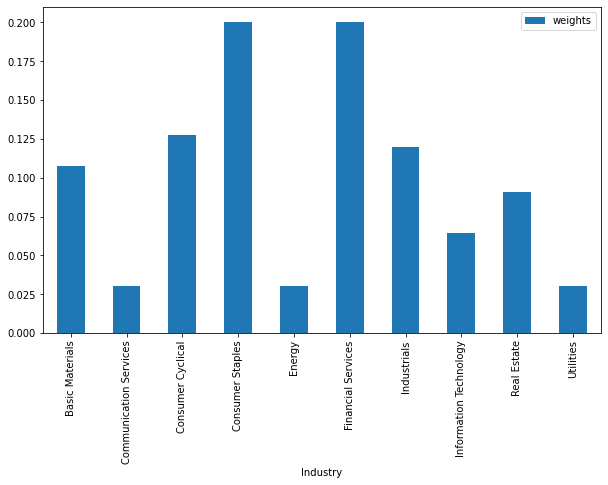

In [ ]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

w_classes.plot(kind='bar')

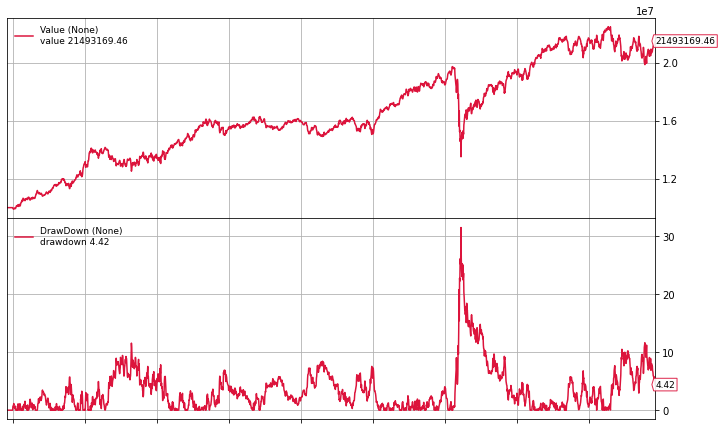

In [ ]:
############################################################
# Backtesting Mean ADD Strategy
############################################################

assets = returns.columns.tolist()
weights = models['ADD']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

,ABX.TO,AEM.TO,ATD.TO,BCE.TO,CAR-UN.TO,CCL-B.TO,CCO.TO,CNQ.TO,CNR.TO,CP.TO,...,FM.TO,FTS.TO,GIB-A.TO,IFC.TO,IMO.TO,L.TO,MRU.TO,NA.TO,RCI-B.TO,TECK-B.TO
4509,0.1546%,4.0204%,5.0871%,2.4863%,5.2185%,9.7315%,1.1686%,0.2845%,0.7931%,5.3514%,...,2.8246%,11.3592%,7.4435%,14.0698%,1.5468%,4.1533%,10.7595%,5.9302%,0.5137%,1.2342%


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0057d1e6d0>],
      dtype=object)

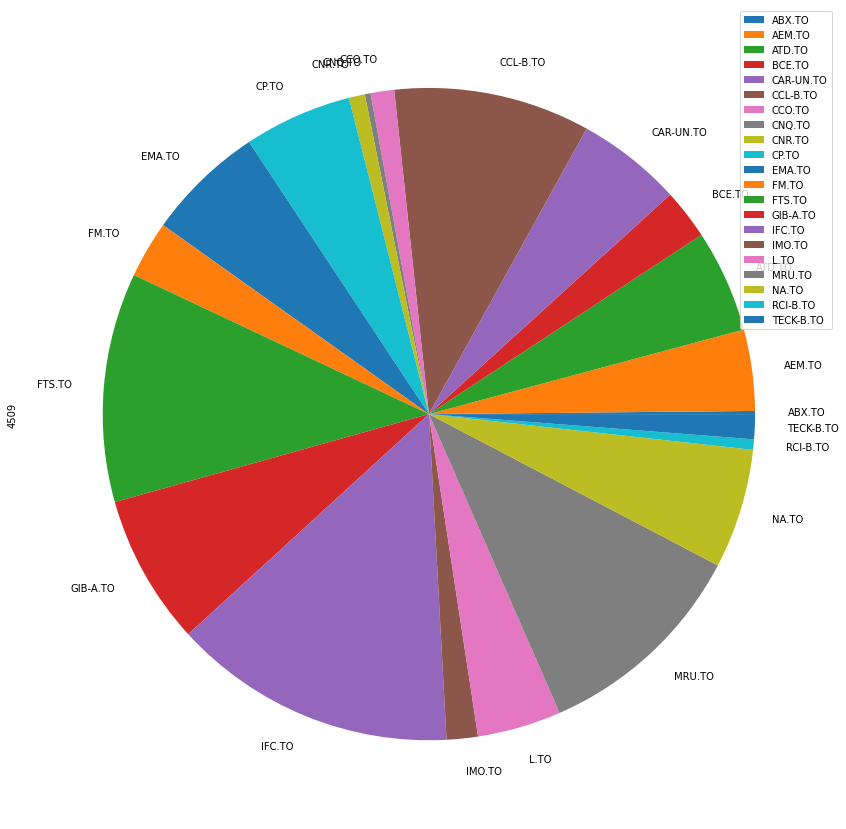

In [ ]:
############################################################
# Plotting the composition of the last ADD portfolio
############################################################

w = pd.DataFrame(models['ADD'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean CDaR', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

# remove those tickers that have weights that are <= 0.0001
w1 = w.T
w2 = w1.loc[:, (w1 > 0.0001).any(axis=0)]
display(w2)

w2.T.plot.pie(subplots=True, figsize=(20, 15))

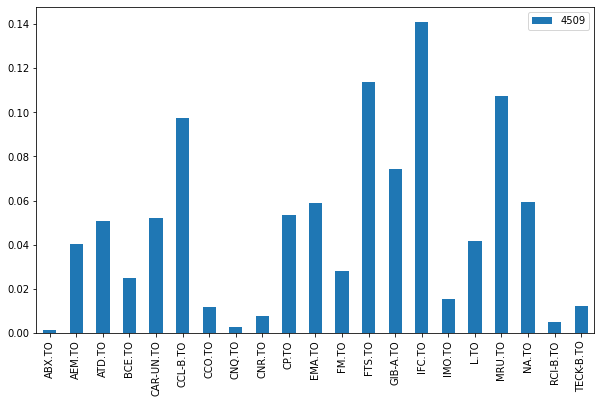

In [ ]:
w2.T.plot(kind='bar')

,weights
Industry,
Basic Materials,8.2338%
Communication Services,3.0000%
Consumer Cyclical,9.7315%
Consumer Staples,20.0000%
Energy,3.0000%
Financial Services,20.0000%
Industrials,6.1445%
Information Technology,7.4435%
Real Estate,5.2185%


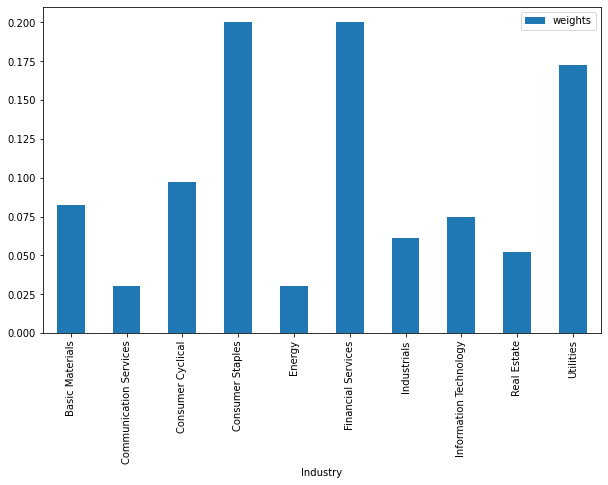

In [ ]:
############################################################
# Composition per Industry
############################################################

w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()
w_classes.columns = ['weights']
display(w_classes)

w_classes.plot(kind='bar')

# 4. Conclusion
In this example, the best strategy in terms of performance is CVaR . The ranking of strategies in base of performance follows:

CVaR (10.21%): Conditional Value at Risk.

SLPM (9.61%): Second Lower Partial Moment (a.k.a Sortino Ratio)

MV (8.94%): Mean Variance.

ADD (8.87%): Average Drawdown of uncompunded cumulative returns.

SPTSX 60 (5.34%): Buy and Hold SPTSX 60.






